In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import wrangle

import warnings
warnings.filterwarnings('ignore')

In [43]:
# set style defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
# change setting to view all columns in jupyter notebook
pd.set_option('display.max_columns', None)

In [4]:
# use a function to pull in the data
fires = wrangle.wrangle_fires()
fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


# Univariate Analysis

In [5]:
# check info
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166753 entries, 0 to 2166752
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fire_year         int64         
 1   discovery_date    datetime64[ns]
 2   general_cause     object        
 3   containment_date  datetime64[ns]
 4   fire_size         float64       
 5   latitude          float64       
 6   longitude         float64       
 7   state             object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 148.8+ MB


In [6]:
# set discovery date as index
df = fires.set_index('discovery_date').sort_index()
df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state
discovery_date,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY


In [7]:
# check oldest and newest discovery dates in the dataset
print(df.index.min(), df.index.max())

1992-01-01 00:00:00 2018-12-31 00:00:00


### We have 26 years of data.

In [8]:
# create a year and month column
df['year'] = df.index.year
df['month'] = df.index.month_name()
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [9]:
# check counts for each cause
df.general_cause.value_counts()

Missing data/not specified/undetermined       547438
Debris and open burning                       507219
Natural                                       312807
Arson/incendiarism                            310320
Equipment and vehicle use                     175824
Recreation and ceremony                        92725
Misuse of fire by a minor                      64630
Smoking                                        61689
Railroad operations and maintenance            36437
Power generation/transmission/distribution     28491
Fireworks                                      17205
Other causes                                    9763
Firearms and explosives use                     2205
Name: general_cause, dtype: int64

### It looks like a good chunk of our data has no specified cause.

<AxesSubplot:>

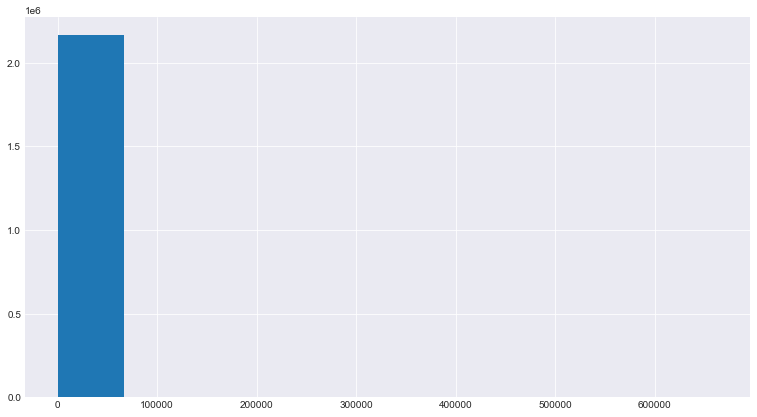

In [44]:
# plot fire size
df.fire_size.hist()

In [11]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

### The data contains some outliers when it comes to fire size

In [46]:
# # create a scatter plot of fire by latitude and longitude
# sns.scatterplot(x='longitude', y='latitude', hue='state', data=df)

In [13]:
# check value counts by state
df.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

### States in the NorthEastern part of the United States have the least wildfires. Not surprisingly, California has the most. Other states with the most wildfires seem to be primarily in the South.

# How has the occurrence of wildfires changed over time? How does wildfire seasonality vary by location?

### What is the number of fires per year for all years we have in the data?

<AxesSubplot:xlabel='year', ylabel='count'>

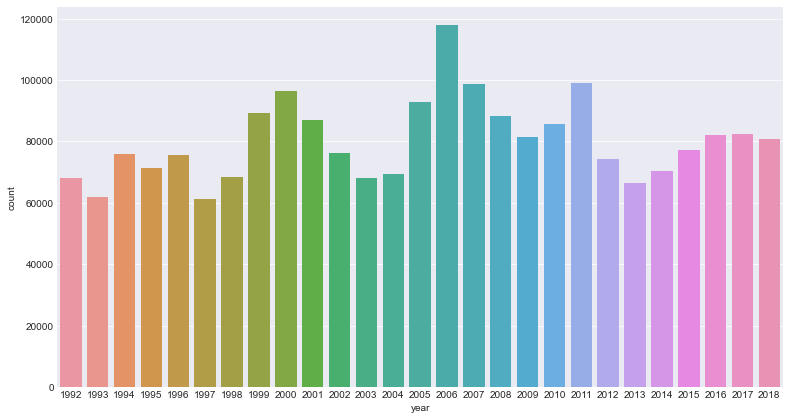

In [47]:
# plot counts by year
sns.countplot(data=df, x='year')

### 2006, 2007, and 2011 had the most wildfires. There does almost appear to be a cycle of 5-6 years for the amount of wildfires.

### Are wildfires more prevalent at certain times of year?

<AxesSubplot:xlabel='month', ylabel='count'>

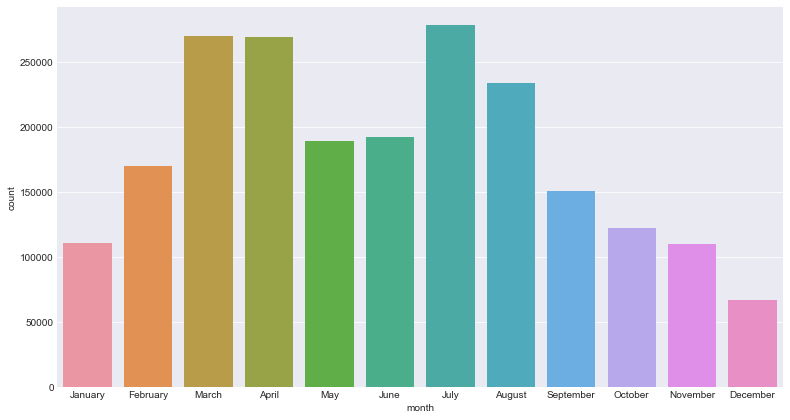

In [48]:
# plot counts by month
sns.countplot(data=df, x='month')

### Not surprisingly, July & August tend to have more fires which is likely due to heat, camping, and dry weather. It is surprising to see that March & April have a higher number of fires as well.

### Get visualization of value counts by state

<AxesSubplot:xlabel='count', ylabel='state'>

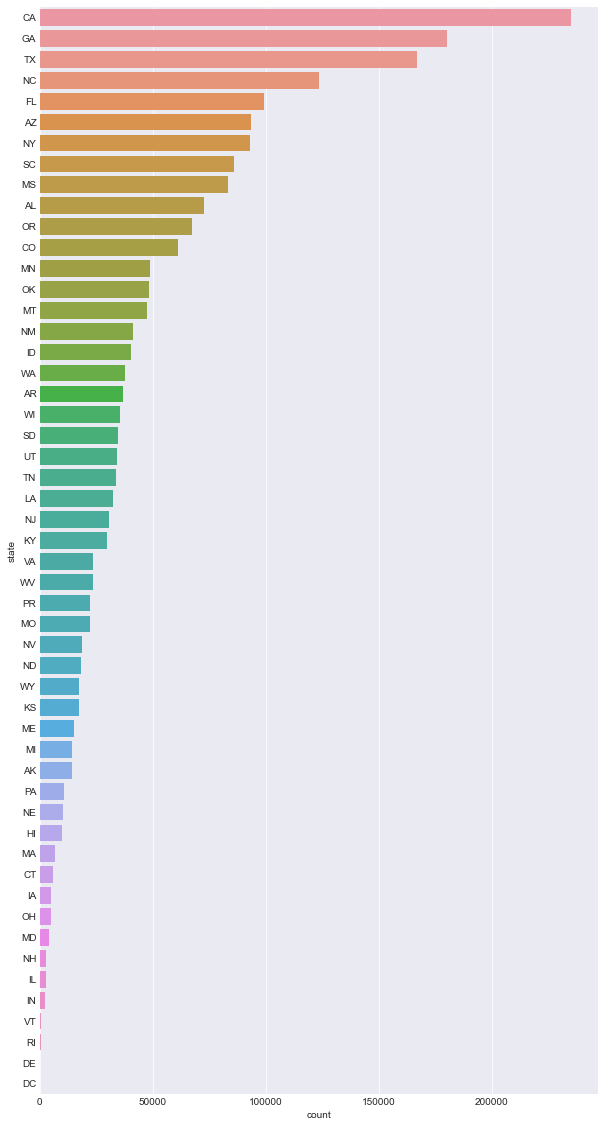

In [49]:
# plot counts by state
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='state', order=df.state.value_counts().index)

### What does the number of fires and size of fires look like by month?

In [57]:
# resample by month and get count of wildfires by month
num_fires_by_month = df.resample('M').fire_year.count()
num_fires_by_month.head()

discovery_date
1992-01-31    3603
1992-02-29    7114
1992-03-31    8706
1992-04-30    7807
1992-05-31    8572
Freq: M, Name: fire_year, dtype: int64

In [58]:
# check number of rows
num_fires_by_month.shape

(324,)

In [59]:
# check which month and year combination had the most fires
num_fires_by_month.idxmax()

Timestamp('2006-03-31 00:00:00', freq='M')

In [60]:
# check how many fires happened that month
num_fires_by_month.max()

19001

### March 2006 had the highest number of fires within the dataset with slightly over 19K fires occurring in that month.

<AxesSubplot:xlabel='discovery_date'>

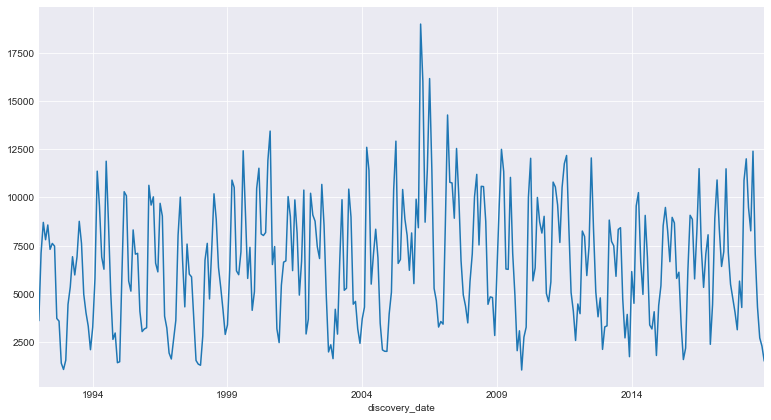

In [62]:
# plot monthly number of fires over the years
num_fires_by_month.plot()

<AxesSubplot:xlabel='discovery_date'>

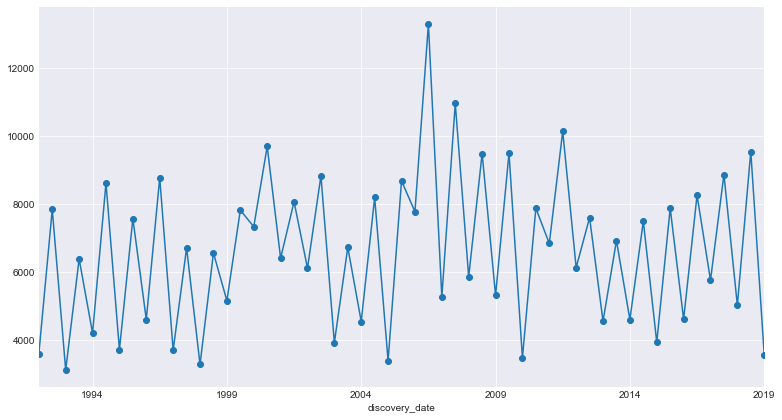

In [63]:
# plot number of fires over the years resampled by 6 months
num_fires_by_month.resample('6M').mean().plot(marker='o')

<AxesSubplot:xlabel='discovery_date'>

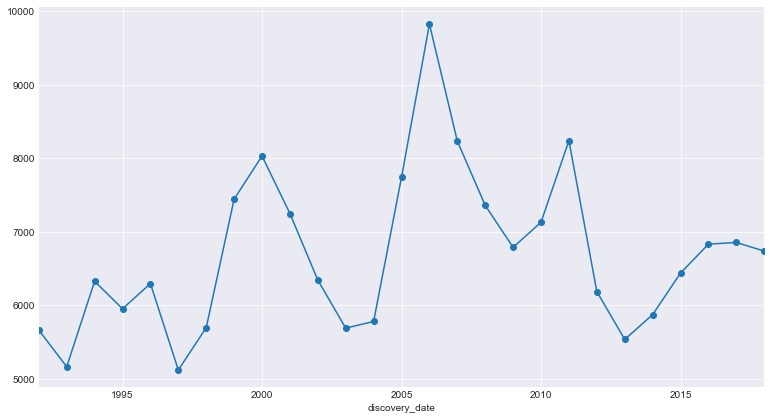

In [73]:
# plot number of fires over the years resampled by a year
num_fires_by_month.resample('Y').mean().plot(marker='o')

In [23]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [56]:
# resample by month and get summed size of wildfires by month
size_fires_by_month = df.resample('M').fire_size.sum()
size_fires_by_month.head()

discovery_date
1992-01-31     32394.200
1992-02-29     84918.650
1992-03-31    129638.123
1992-04-30     94382.285
1992-05-31    124084.533
Freq: M, Name: fire_size, dtype: float64

In [65]:
# check which month and year combination had the largest summed size of wildfires
size_fires_by_month.idxmax()

Timestamp('2015-06-30 00:00:00', freq='M')

In [66]:
# check total sum of fire sizes that month
size_fires_by_month.max()

5248481.509999639

### Figure out how much this is and determine a good reference so audience can understand the impact

<AxesSubplot:xlabel='year'>

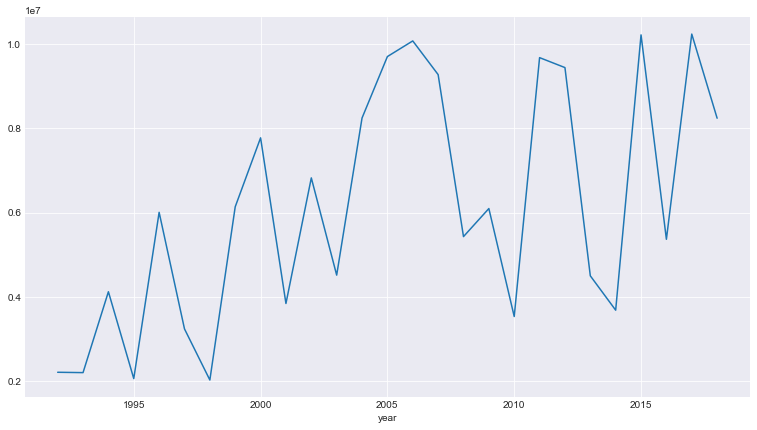

In [54]:
# plot monthly summed size of fires over the years
df.groupby('year').fire_size.sum().plot()

<AxesSubplot:xlabel='discovery_date'>

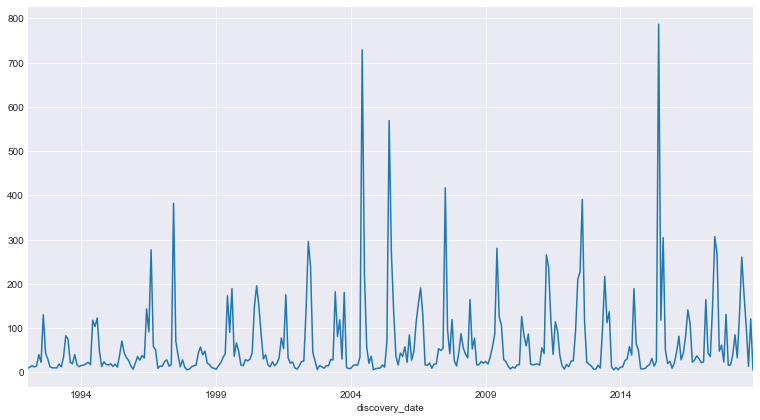

In [55]:
# plot monthly average size of fires over the years
df.resample('M').fire_size.mean().plot()

<AxesSubplot:xlabel='discovery_date'>

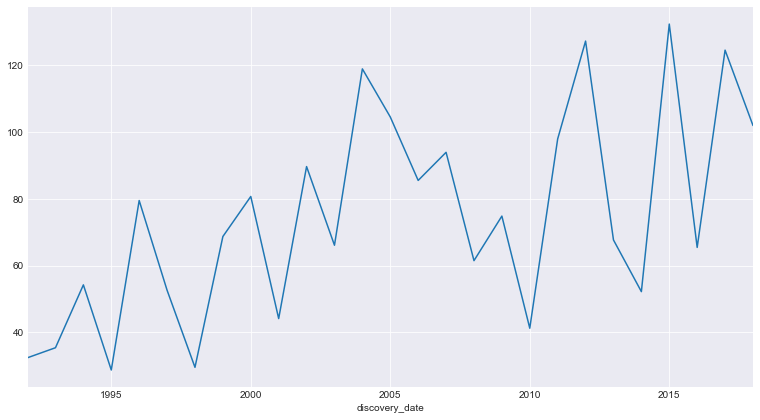

In [67]:
# plot yearly average size of fires over the years
df.resample('Y').fire_size.mean().plot()

### When resampling by year, there is not a clear trend in the number of wildfires however, we do see that the average size of wildfires is on an upward trend